<a href="https://colab.research.google.com/github/maverick98/Coursera/blob/master/machine_learning_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Problem Statement
Ensuring access to clean drinking water is vital for health, constituting a fundamental human
right and a key element of sound health protection policies. This issue holds significance at the
national, regional, and local levels in terms of both health and development. The objective is to
predict the potability of water based on given features.
The water_potability.csv file contains water quality metrics for 3276 different water bodies
```



**We have uploaded the csv file from https://drive.google.com/file/d/1YdQ8Uvc8KYy_u8pNQGoNHaaFH7wEBCCu/view to our google drive. Loading from there by mounting the drive here**

In [29]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/Assignment-1_Set-8_Dataset.csv /content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [31]:
# b. Print 2 rows for sanity check
df = pd.read_csv("/content/Assignment-1_Set-8_Dataset.csv")
print(df.head(2))

        ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0      NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.71608  129.422921  18630.057858     6.635246         NaN    592.885359   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  


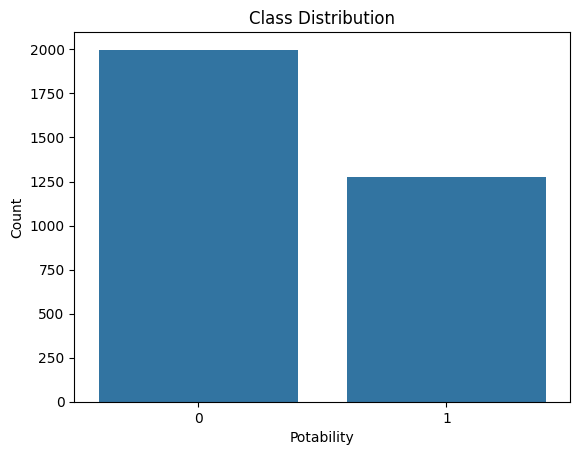

In [32]:

# c. Class imbalance visualization
sns.countplot(x='Potability', data=df)
plt.title('Class Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

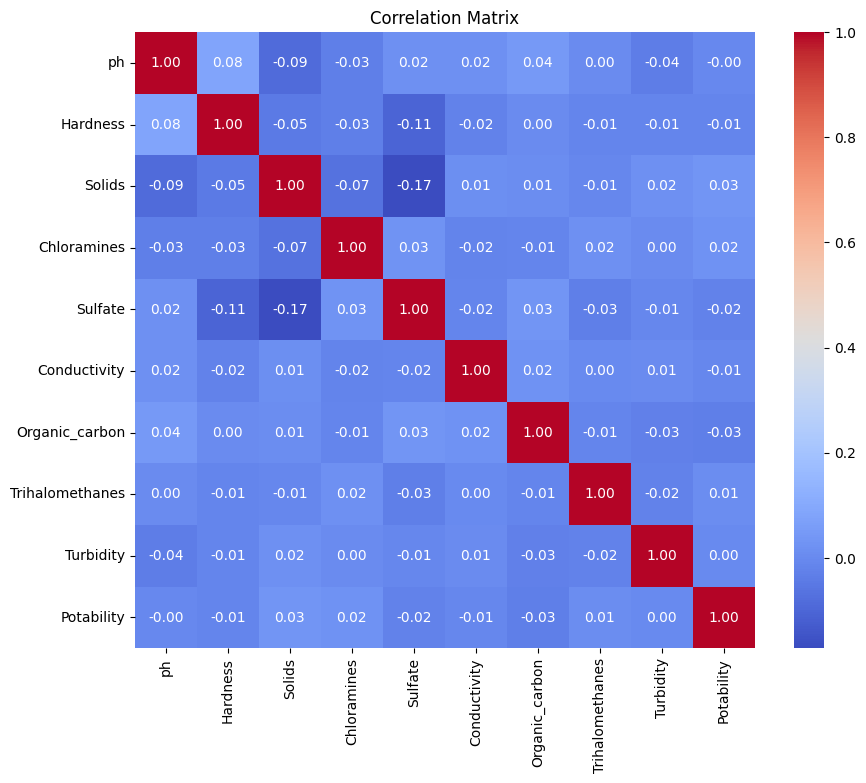

In [33]:

# d. Correlational analysis and visualization
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [34]:




# Correlation analysis will help in identifying highly correlated features. Highly correlated features can be redundant for the model and may affect model performance. Thus, it may have an effect on feature selection.


In [35]:
# a. Pre-processing steps
# Checking for missing values
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [36]:
# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [37]:
print(df_imputed.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [38]:




# b. Feature Engineering
# Splitting features and target variable
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:

logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)


decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [40]:

logistic_pred = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)
logistic_f1 = f1_score(y_test, logistic_pred)
logistic_roc_auc = roc_auc_score(y_test, logistic_pred)

print("Logistic Regression Performance:")
print(f"Accuracy: {logistic_accuracy}")
print(f"Precision: {logistic_precision}")
print(f"Recall: {logistic_recall}")
print(f"F1 Score: {logistic_f1}")
print(f"ROC AUC Score: {logistic_roc_auc}")
print(classification_report(y_test, logistic_pred))

# Decision Tree
decision_tree_pred = decision_tree_model.predict(X_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred)
decision_tree_recall = recall_score(y_test, decision_tree_pred)
decision_tree_f1 = f1_score(y_test, decision_tree_pred)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_pred)

print("Decision Tree Performance:")
print(f"Accuracy: {decision_tree_accuracy}")
print(f"Precision: {decision_tree_precision}")
print(f"Recall: {decision_tree_recall}")
print(f"F1 Score: {decision_tree_f1}")
print(f"ROC AUC Score: {decision_tree_roc_auc}")
print(classification_report(y_test, decision_tree_pred))



Logistic Regression Performance:
Accuracy: 0.6280487804878049
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

Decision Tree Performance:
Accuracy: 0.6021341463414634
Precision: 0.4674329501915709
Recall: 0.5
F1 Score: 0.4831683168316832
ROC AUC Score: 0.5813106796116505
              precision    recall  f1-score   support

         0.0       0.69      0.66      0.68       412
         1.0       0.47      0.50      0.48       244

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.61      0.60      0.60       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde